# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("penguins.csv")
df1.sample(10)  #这sex怎么还有乱写的啊，还有只写了个点的？

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
184,Chinstrap,Dream,42.5,16.7,187.0,3350.0,FEMALE
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
141,Adelie,Dream,40.6,17.2,187.0,3475.0,MALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,FEMALE


In [3]:
df1.info() #345行，第一行是表格头不算，当列名了，真正的数据行有344行  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**可以看到，除了类和岛屿，基本上都有空值,只要是分类数据都改成category。**

从输出结果来看，`cleaned_data`数据共有344条观察值，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`变量存在缺失值，将在后续进行评估和清理。

数据类型方面，我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [4]:
df1.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df1["species"] = df1["species"].astype("category")
df1["island"] = df1["island"].astype("category")
df1["sex"] = df1["sex"].astype("category")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


# 处理空值

In [7]:
df1.query("culmen_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.query("culmen_depth_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.query("flipper_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
df1.query("body_mass_g.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
df1.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


**可见，这个index为3和339的这两行要删掉**

In [12]:
df1.dropna(subset = ["culmen_length_mm"],inplace = True)  #除了性别随便丢一个列名就行了，删除这两行

In [13]:
df1.query("flipper_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [14]:
#性别那个空值还不少，我们看一下

In [15]:
df1.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值。由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值，可以保留这些行。

# 处理重复

In [16]:
# 检查有没有完全一行相同的就行了，这些数据都是支持重复的

In [17]:
df1.duplicated().sum()  

np.int64(0)

# 处理不一致

In [18]:
df1.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,MALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,FEMALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE


In [19]:
df1["species"].value_counts()  #可以见到企鹅类型有三类

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [20]:
df1["island"].value_counts()  #可以见到岛屿有三个

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [21]:
df1["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [22]:
df1.query("sex == '.'")  #找到这一行，看看什么情况，将其替换为NaN，替换成空值用np的nan函数

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [23]:
df1["sex"] = df1["sex"].replace(".",np.nan)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23384\1683361972.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df1["sex"] = df1["sex"].replace(".",np.nan)


In [24]:
#df1.loc[336,"sex"] = np.nan

In [25]:
df1.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                     NaN
Name: 336, dtype: object

# 处理无效数据

In [26]:
df1.describe()  #从结果上看，并不存在无实际意义的数据

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 保存数据

In [27]:
cleaned_data = df1.copy()

## 探索数据,探索数据也算是分析数据的领域了

In [28]:
# 开始绘制前，我们可以先设置下绘制的主题色盘

In [29]:
sns.set_palette("pastel") #pastel是比较小清新类的色盘，palette是调色盘的意思

In [30]:
# 第二步，探索不同变量之间关系前，先看单个变量的，我们可以先关注分类变量

**我们先看一下企鹅种类比例，这里适合用饼图去看三个种类各自的占比是多少，但是绘制饼图需要各个种类的具体的数量才可以算比例**

In [31]:
## 获取数量

In [32]:
species_counts = cleaned_data["species"].value_counts()

In [33]:
species_counts.index

CategoricalIndex(['Adelie', 'Gentoo', 'Chinstrap'], categories=['Adelie', 'Chinstrap', 'Gentoo'], ordered=False, dtype='category', name='species')

In [34]:
species_counts

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [35]:
## 绘制饼图

([<matplotlib.patches.Wedge at 0x206ec3f5670>,
 [Text(0.20095570279004357, 1.0814882364206093, 'Adelie'),
  Text(-0.7954730250570456, -0.7597517136582143, 'Gentoo'),
  Text(0.892288738448971, -0.6432890541872635, 'Chinstrap')],
 [Text(0.10961220152184194, 0.5899026744112414, '44%'),
  Text(-0.433894377303843, -0.41441002563175316, '36%'),
  Text(0.48670294824489324, -0.3508849386475982, '20%')])

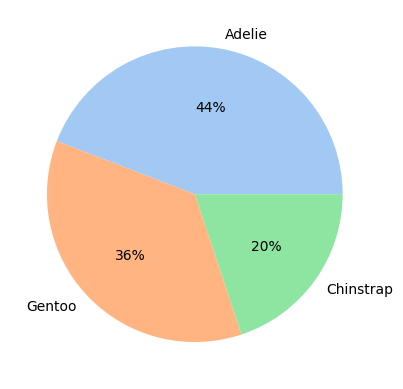

In [36]:
plt.pie(species_counts,labels=species_counts.index,autopct = "%.0f%%")

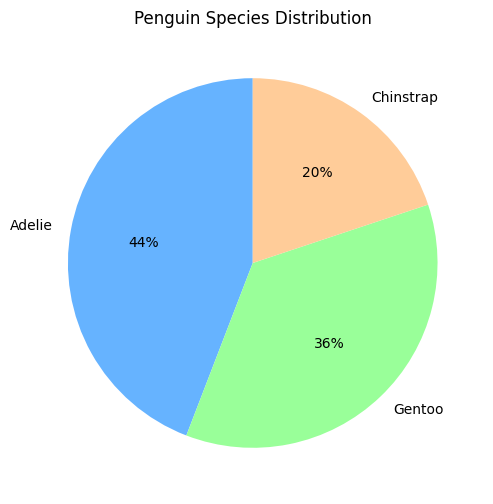

In [37]:
plt.figure(figsize=(8, 6))  #创建画布，plt.figure，里面给出宽高值，初始化一个窗口
plt.pie(
    species_counts, 
    labels=species_counts.index,  # 正确传递标签
    autopct="%.0f%%",
    startangle=90,   #设置从哪里开始绘制变量占比，上面我们没有指定，就是从0度开始绘制，就是从右侧绘制
    colors=['#66b3ff','#99ff99','#ffcc99']  # 可选颜色设置，可见可以给多个
)
plt.title("Penguin Species Distribution") #也有参数可选，fontsize=14 字体大小，color='blue' 标题颜色，pad=20 标题与图表的间距
plt.show()

# 绘制单个图表时，流程应该是 初始化一个图表——绘制图表——给上标题或其他描述——展示

In [38]:
### 评估分类数据企鹅种类，可以看到在这个岛上，adelie类企鹅最多，而chinstrap类企鹅较少

**然后看哪个岛上的企鹅最多**

In [39]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [40]:
island_counts = cleaned_data["island"].value_counts()

In [41]:
island_counts

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

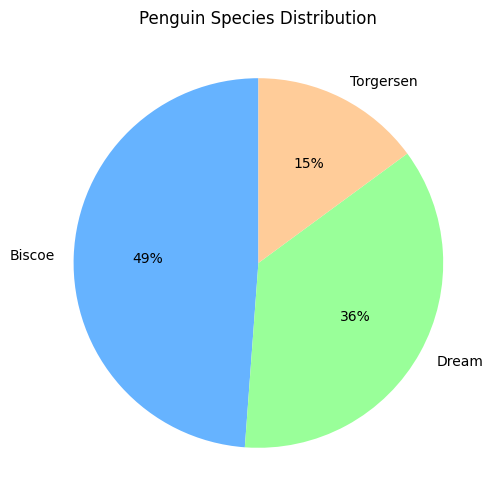

In [42]:
plt.figure(figsize=(8,6))
plt.pie(
    island_counts,
    labels=island_counts.index,
    autopct = "%.0f%%",
    startangle = 90,
    colors = ['#66b3ff','#99ff99','#ffcc99']
)
plt.title("Penguin Species Distribution")
plt.show()

In [43]:
### 评估每个岛的企鹅占比，可以看到biscoe这个岛企鹅是最多的，最后就是torgersen这个岛

**企鹅性别比例**

In [44]:
sex_counts = cleaned_data["sex"].value_counts()

In [45]:
sex_counts

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

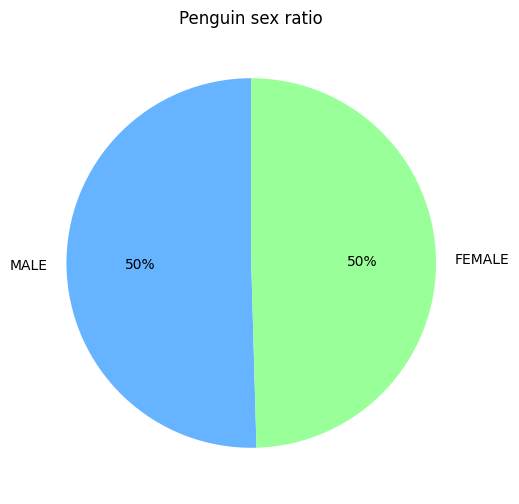

In [46]:
plt.figure(figsize=(8,6))
plt.pie(
    sex_counts,
    labels = sex_counts.index,
    autopct = "%.0f%%",
    startangle = 90,
    colors = ['#66b3ff','#99ff99','#ffcc99']
)
plt.title("Penguin sex ratio")
plt.show()

In [47]:
# 现在我们三个分类变量都已经看完了，我们看看分类变量之间的关系

**每个岛上不同种类企鹅的分布**

<Axes: xlabel='island', ylabel='count'>

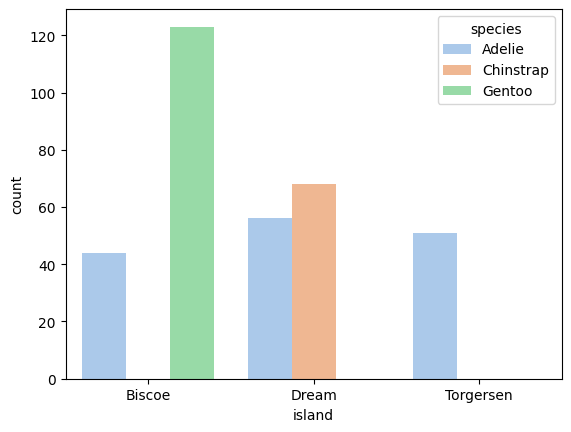

In [48]:
sns.countplot(cleaned_data,x = "island",hue = "species")  #计数图是指计量每个量的个值，然而这里我们还要给每个变量再细分成每个种类

In [49]:
### 评估一下每个岛上不同种类的企鹅分布，可以看到biscoe这个岛上，gentoo这类的企鹅很多，这类企鹅在别的岛没有，adelie我们知道样本内是
### 数量最多的，三个岛上均出现，而chinstrap和gentoo这两类企鹅旨在dream island 和biscoe出现

**每个岛上企鹅性别的分布**

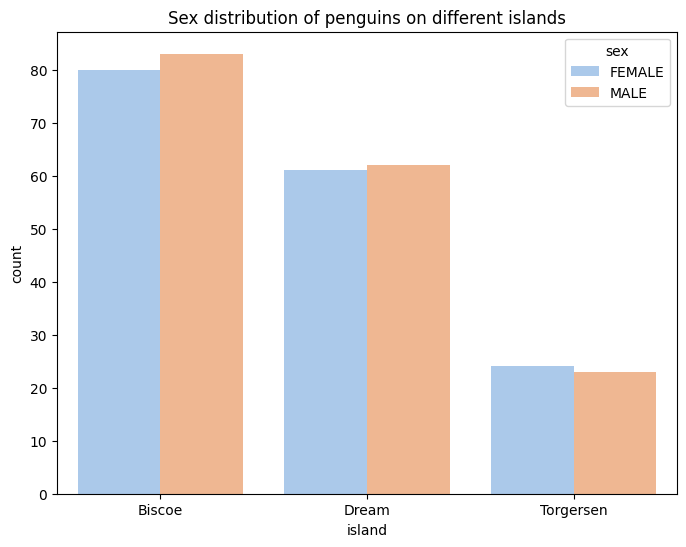

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(cleaned_data,x="island",hue = "sex")
plt.title("Sex distribution of penguins on different islands")
plt.show()

**每种企鹅的性别分布**

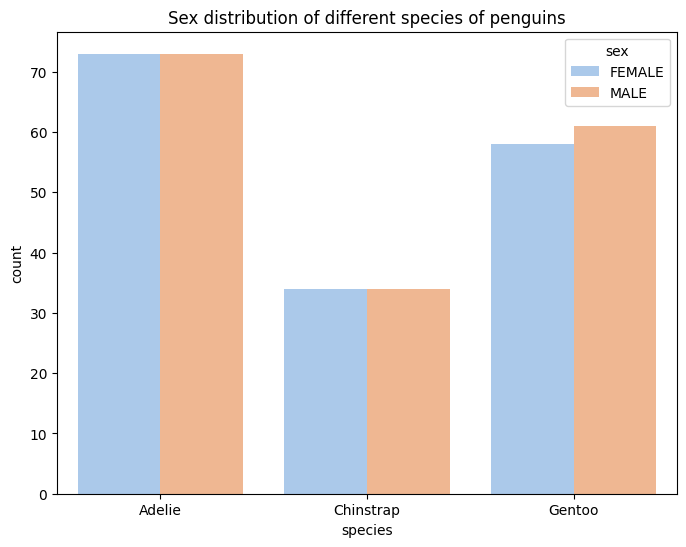

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(cleaned_data,x="species",hue = "sex")
plt.title("Sex distribution of different species of penguins")
plt.show()

# 前面我们已经对于分类数据做了很多探索，包括只看一个分类数据的情况以及分类数据之间的关系

### 接下来是探索数值数据了

也是一样，我们应该正常看一看每个数值数据是怎么样，探索嘛，然后再看两两之间的关系，一个个看我们有很多个图，什么直方图、密度图等等，
两两关系的又有散点图、折线图、条形等等，当然我们可以直接用成对图来看两两关系，成对里也有看每个数据列自己的直线图

In [52]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


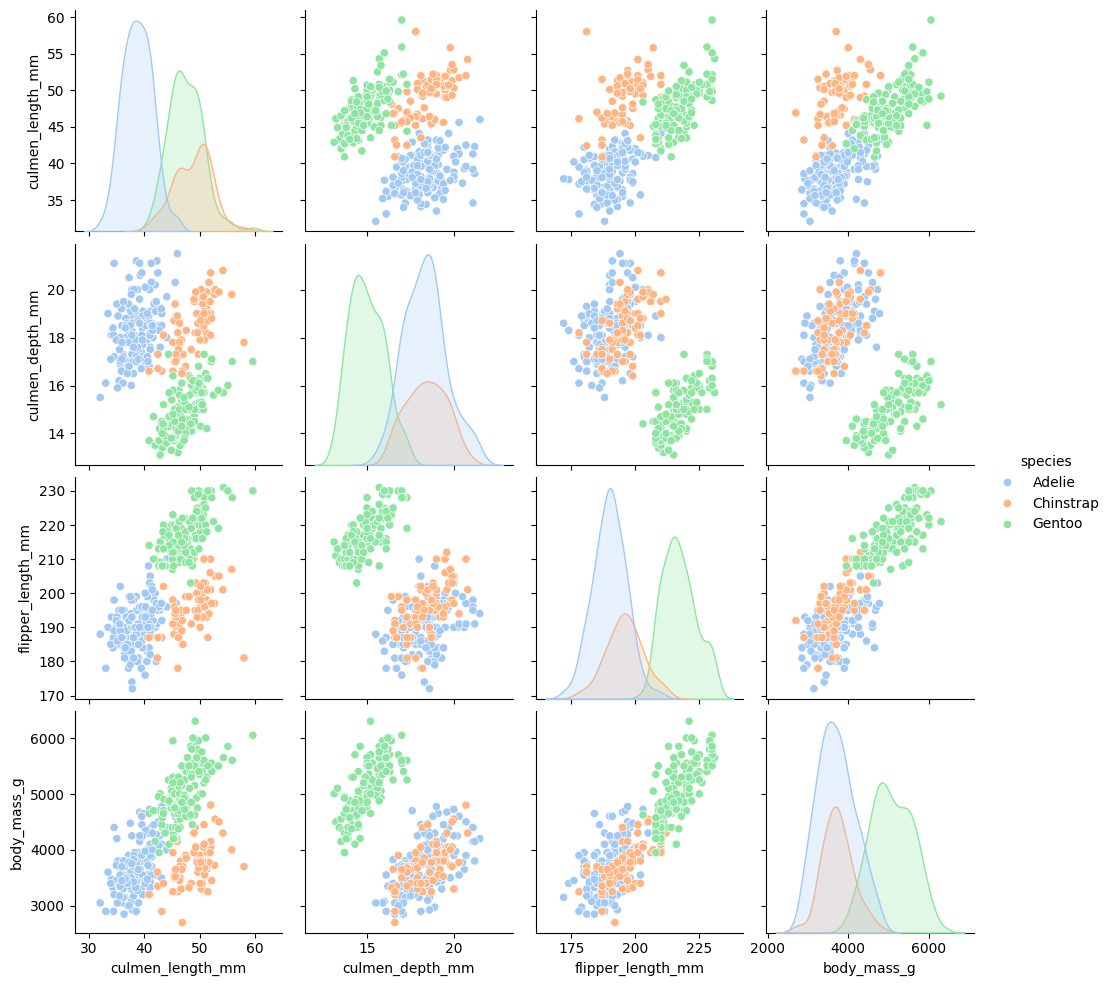

In [53]:
sns.pairplot(cleaned_data,hue = "species")  #给色调上个分种类，注意了哈pairplot成对图是看数值数据的两两关系的

我们给上面的成对图进行了种类的区分后，往往我们可以在上面画一条回归线regression line，表示一种趋势关系

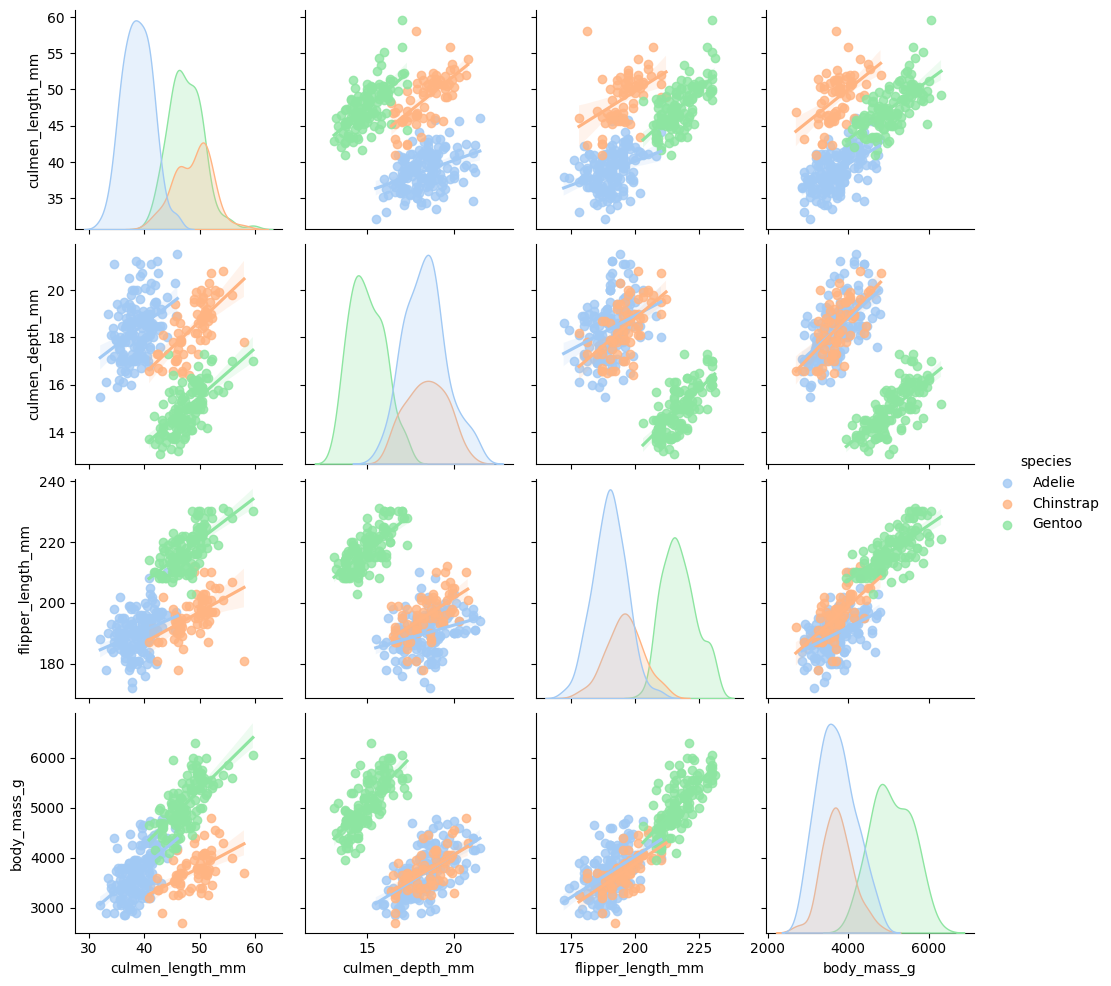

In [54]:
sns.pairplot(cleaned_data,hue = "species",kind="reg")  #给可选参数kind传入reg，表示画趋势线，然后我们还可以调整成对图的透明度
plt.show()

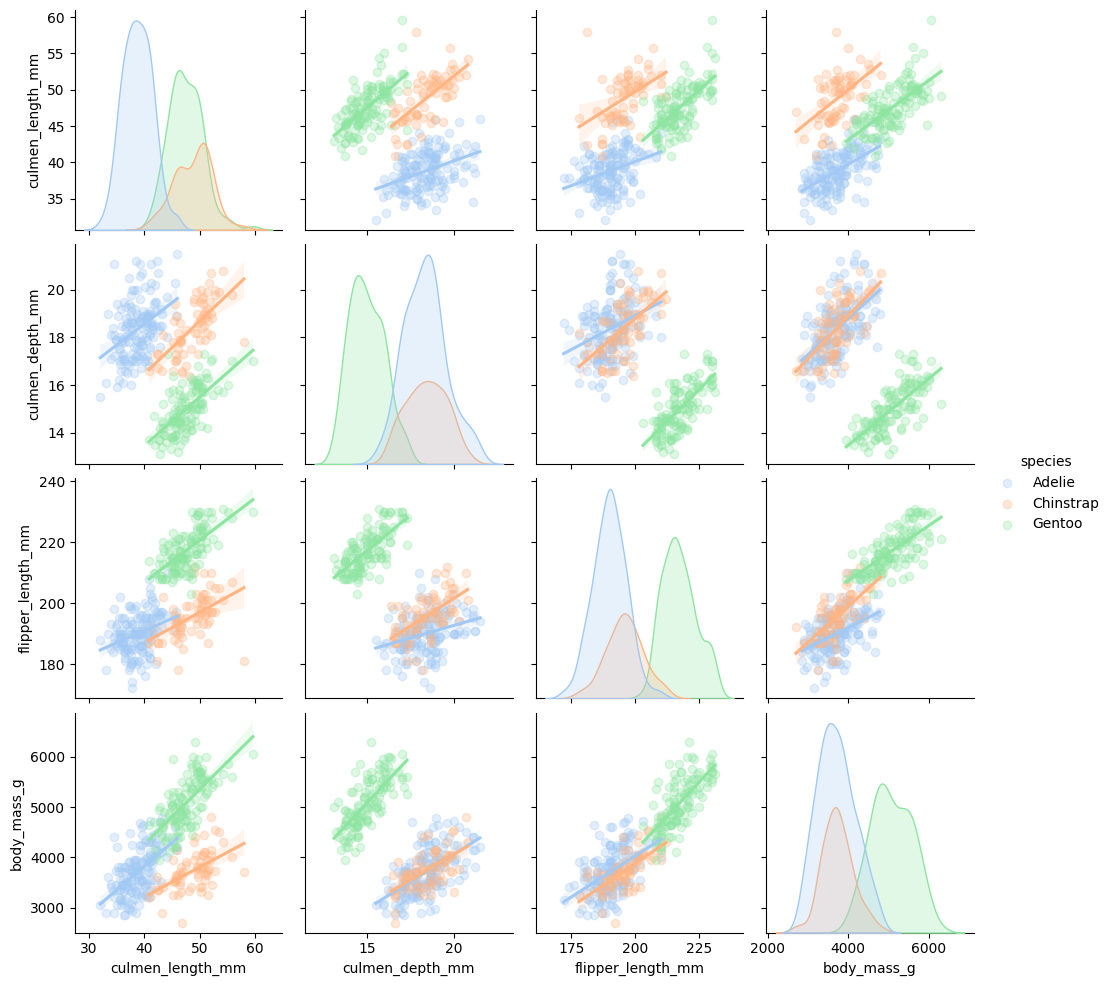

In [55]:
sns.pairplot(cleaned_data,hue="species",kind="reg",plot_kws={"scatter_kws":{"alpha":0.3}})  #调整的是散点图，每个散点图调整它的透明度，透明度只有0~1
#plot_kws参数是用来调整图上的各种具体参数的，比如散点透明度、趋势线颜色等
#但要告诉他具体调整哪些图，比如调整散点图的话就在字典里键写上 scatter_kws

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论，因为毕竟这里是只有300多只企鹅的样本，具体总体是不是这样，还得用假设验证

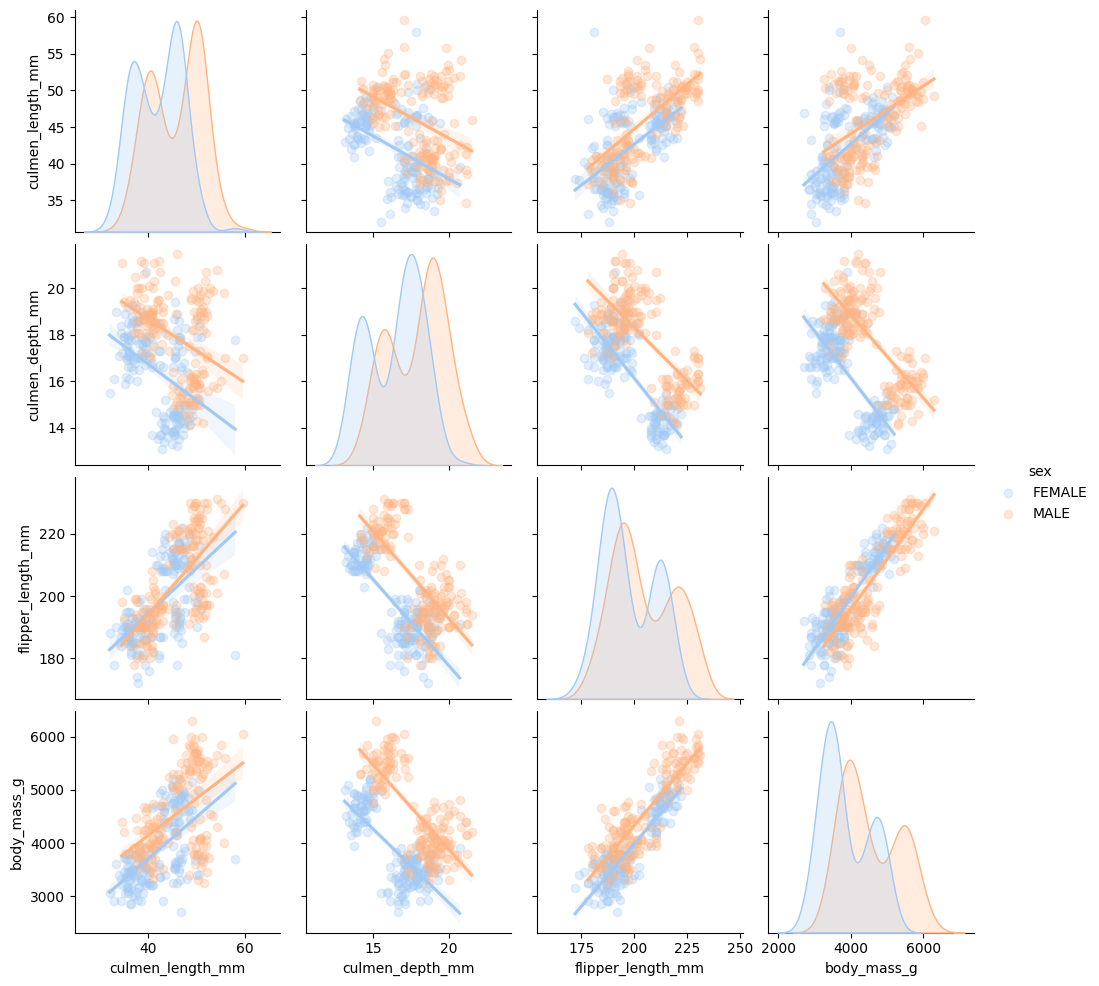

In [61]:
sns.pairplot(cleaned_data,hue="sex",kind="reg",plot_kws = {"scatter_kws":{"alpha":0.3}} )

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。

In [62]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


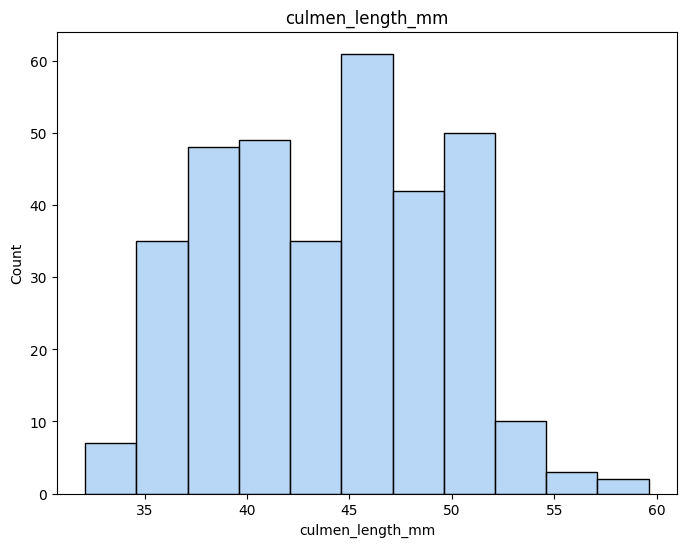

In [65]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data,x="culmen_length_mm")
plt.title("culmen_length_mm")
plt.show()

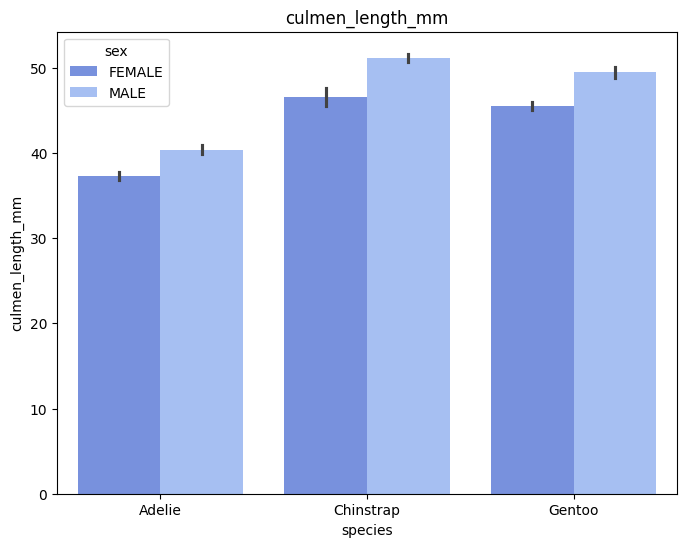

In [74]:
plt.figure(figsize=(8,6))
sns.set_palette("coolwarm")
sns.barplot(cleaned_data,x="species",y="culmen_length_mm",hue="sex",estimator=np.mean)  #估计器estimator是np.max时条形图是在看不同种类里不同性别的企鹅的culmen的长度最长的
plt.title("culmen_length_mm")
plt.show()